## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import scipy as sp
import seaborn as sns
pd.options.mode.chained_assignment = None
from statsmodels.formula.api import ols
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
import sklearn.metrics

from sklearn.preprocessing import PolynomialFeatures

2022-10-09 14:44:06.802216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("../data/curated/match_apartment22_s.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'price', 'suburb', 'beds', 'baths',
       'parking', 'latitudes', 'longitudes', 'school', 'train_station',
       'fitness_gym', 'hospital', 'shopping_center', 'park', '2022income',
       '2022house_price', 'Unnamed: 0.1.1', 'erp_2022',
       'net_internal_migration_2021_22', 'net_overseas_migration_2021_22',
       'natural_increase_2021_22'],
      dtype='object')

In [4]:
# Select usefull columns
apart = pd.DataFrame(df, columns=['price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', '2022income', '2022house_price',\
                                  'erp_2022', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', 'natural_increase_2021_22'])

In [5]:
# Discretization
sub_list = pd.factorize(apart["suburb"])[1]
apart['suburbID'] = pd.factorize(apart["suburb"])[0].astype(np.uint16)

In [6]:
apart.describe()

,price,beds,baths,parking,latitudes,longitudes,school,train_station,fitness_gym,hospital,shopping_center,park,2022income,2022house_price,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22,suburbID
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000
mean,506.419355,1.783602,1.231183,0.977151,-37.828372,145.012401,6746.224328,4365.127957,2459.490860,1735.746371,2442.642339,1355.720296,13582.841129,6.093794e+05,20932.497043,-295.045968,-632.345968,62.200000,28.100806
std,324.029403,0.635597,0.446666,0.514411,0.160163,0.200972,2867.524315,27480.412791,5172.953427,2735.263295,3909.276895,849.103757,5832.561690,1.873232e+05,9195.441954,364.180218,1051.112993,63.834364,23.910821
min,0.000000,1.000000,1.000000,0.000000,-38.159100,143.828600,1267.600000,203.300000,57.000000,0.000000,405.900000,17.600000,2991.200000,1.535000e+05,5077.800000,-1547.400000,-7149.200000,-132.600000,0.000000
25%,380.000000,1.000000,1.000000,1.000000,-37.869200,144.964300,4724.400000,739.100000,878.400000,620.200000,915.400000,871.600000,9969.400000,5.184500e+05,15066.200000,-579.600000,-567.000000,24.600000,7.000000
50%,450.000000,2.000000,1.000000,1.000000,-37.825600,144.992900,7036.000000,1064.600000,1712.800000,1298.800000,1727.650000,1184.200000,13440.400000,6.031250e+05,19350.600000,-274.400000,-349.400000,52.600000,26.000000
75%,540.000000,2.000000,1.000000,1.000000,-37.804600,145.035800,8801.200000,1744.700000,3148.300000,2107.400000,2858.400000,1478.400000,16206.200000,6.767750e+05,26700.900000,-63.400000,-185.200000,95.800000,44.000000
max,5000.000000,5.000000,3.000000,4.000000,-36.099700,147.152100,30231.400000,338989.300000,85570.600000,62269.600000,80656.700000,7352.700000,37027.400000,1.241600e+06,60959.800000,2069.200000,-2.400000,622.400000,97.000000


In [7]:
# remove NaN and duplicates
apart = apart.dropna()
apart.drop_duplicates(keep='first',inplace=True)
apart

,price,suburb,beds,baths,parking,latitudes,longitudes,school,train_station,fitness_gym,hospital,shopping_center,park,2022income,2022house_price,erp_2022,net_internal_migration_2021_22,net_overseas_migration_2021_22,natural_increase_2021_22,suburbID
0,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6,0
1,495,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,627700.0,6335.2,-63.4,-191.0,-7.6,0
2,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6,0
3,420,EAST MELBOURNE,2,1,1,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,627700.0,6335.2,-63.4,-191.0,-7.6,0
4,550,EAST MELBOURNE,1,1,1,-37.8167,144.9879,8137.6,381.0,345.9,620.2,1558.5,1235.1,4224.0,444000.0,6335.2,-63.4,-191.0,-7.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,460,WINCHELSEA,3,1,2,-38.0372,145.1097,5517.5,316.3,3499.2,9575.8,4087.3,1010.0,4133.2,735050.0,6176.0,222.8,-2.4,40.8,95
740,460,WINCHELSEA,3,1,2,-38.0372,145.1097,5517.5,316.3,3499.2,9575.8,4087.3,1010.0,4133.2,384200.0,6176.0,222.8,-2.4,40.8,95
741,399,HEIDELBERG WEST,2,1,1,-37.7531,145.0385,6474.7,2807.3,1787.8,1752.6,2309.1,352.0,9718.8,754750.0,16453.2,-455.4,-116.8,52.2,96
742,399,HEIDELBERG WEST,2,1,1,-37.7531,145.0385,6474.7,2807.3,1787.8,1752.6,2309.1,352.0,9718.8,715700.0,16453.2,-455.4,-116.8,52.2,96


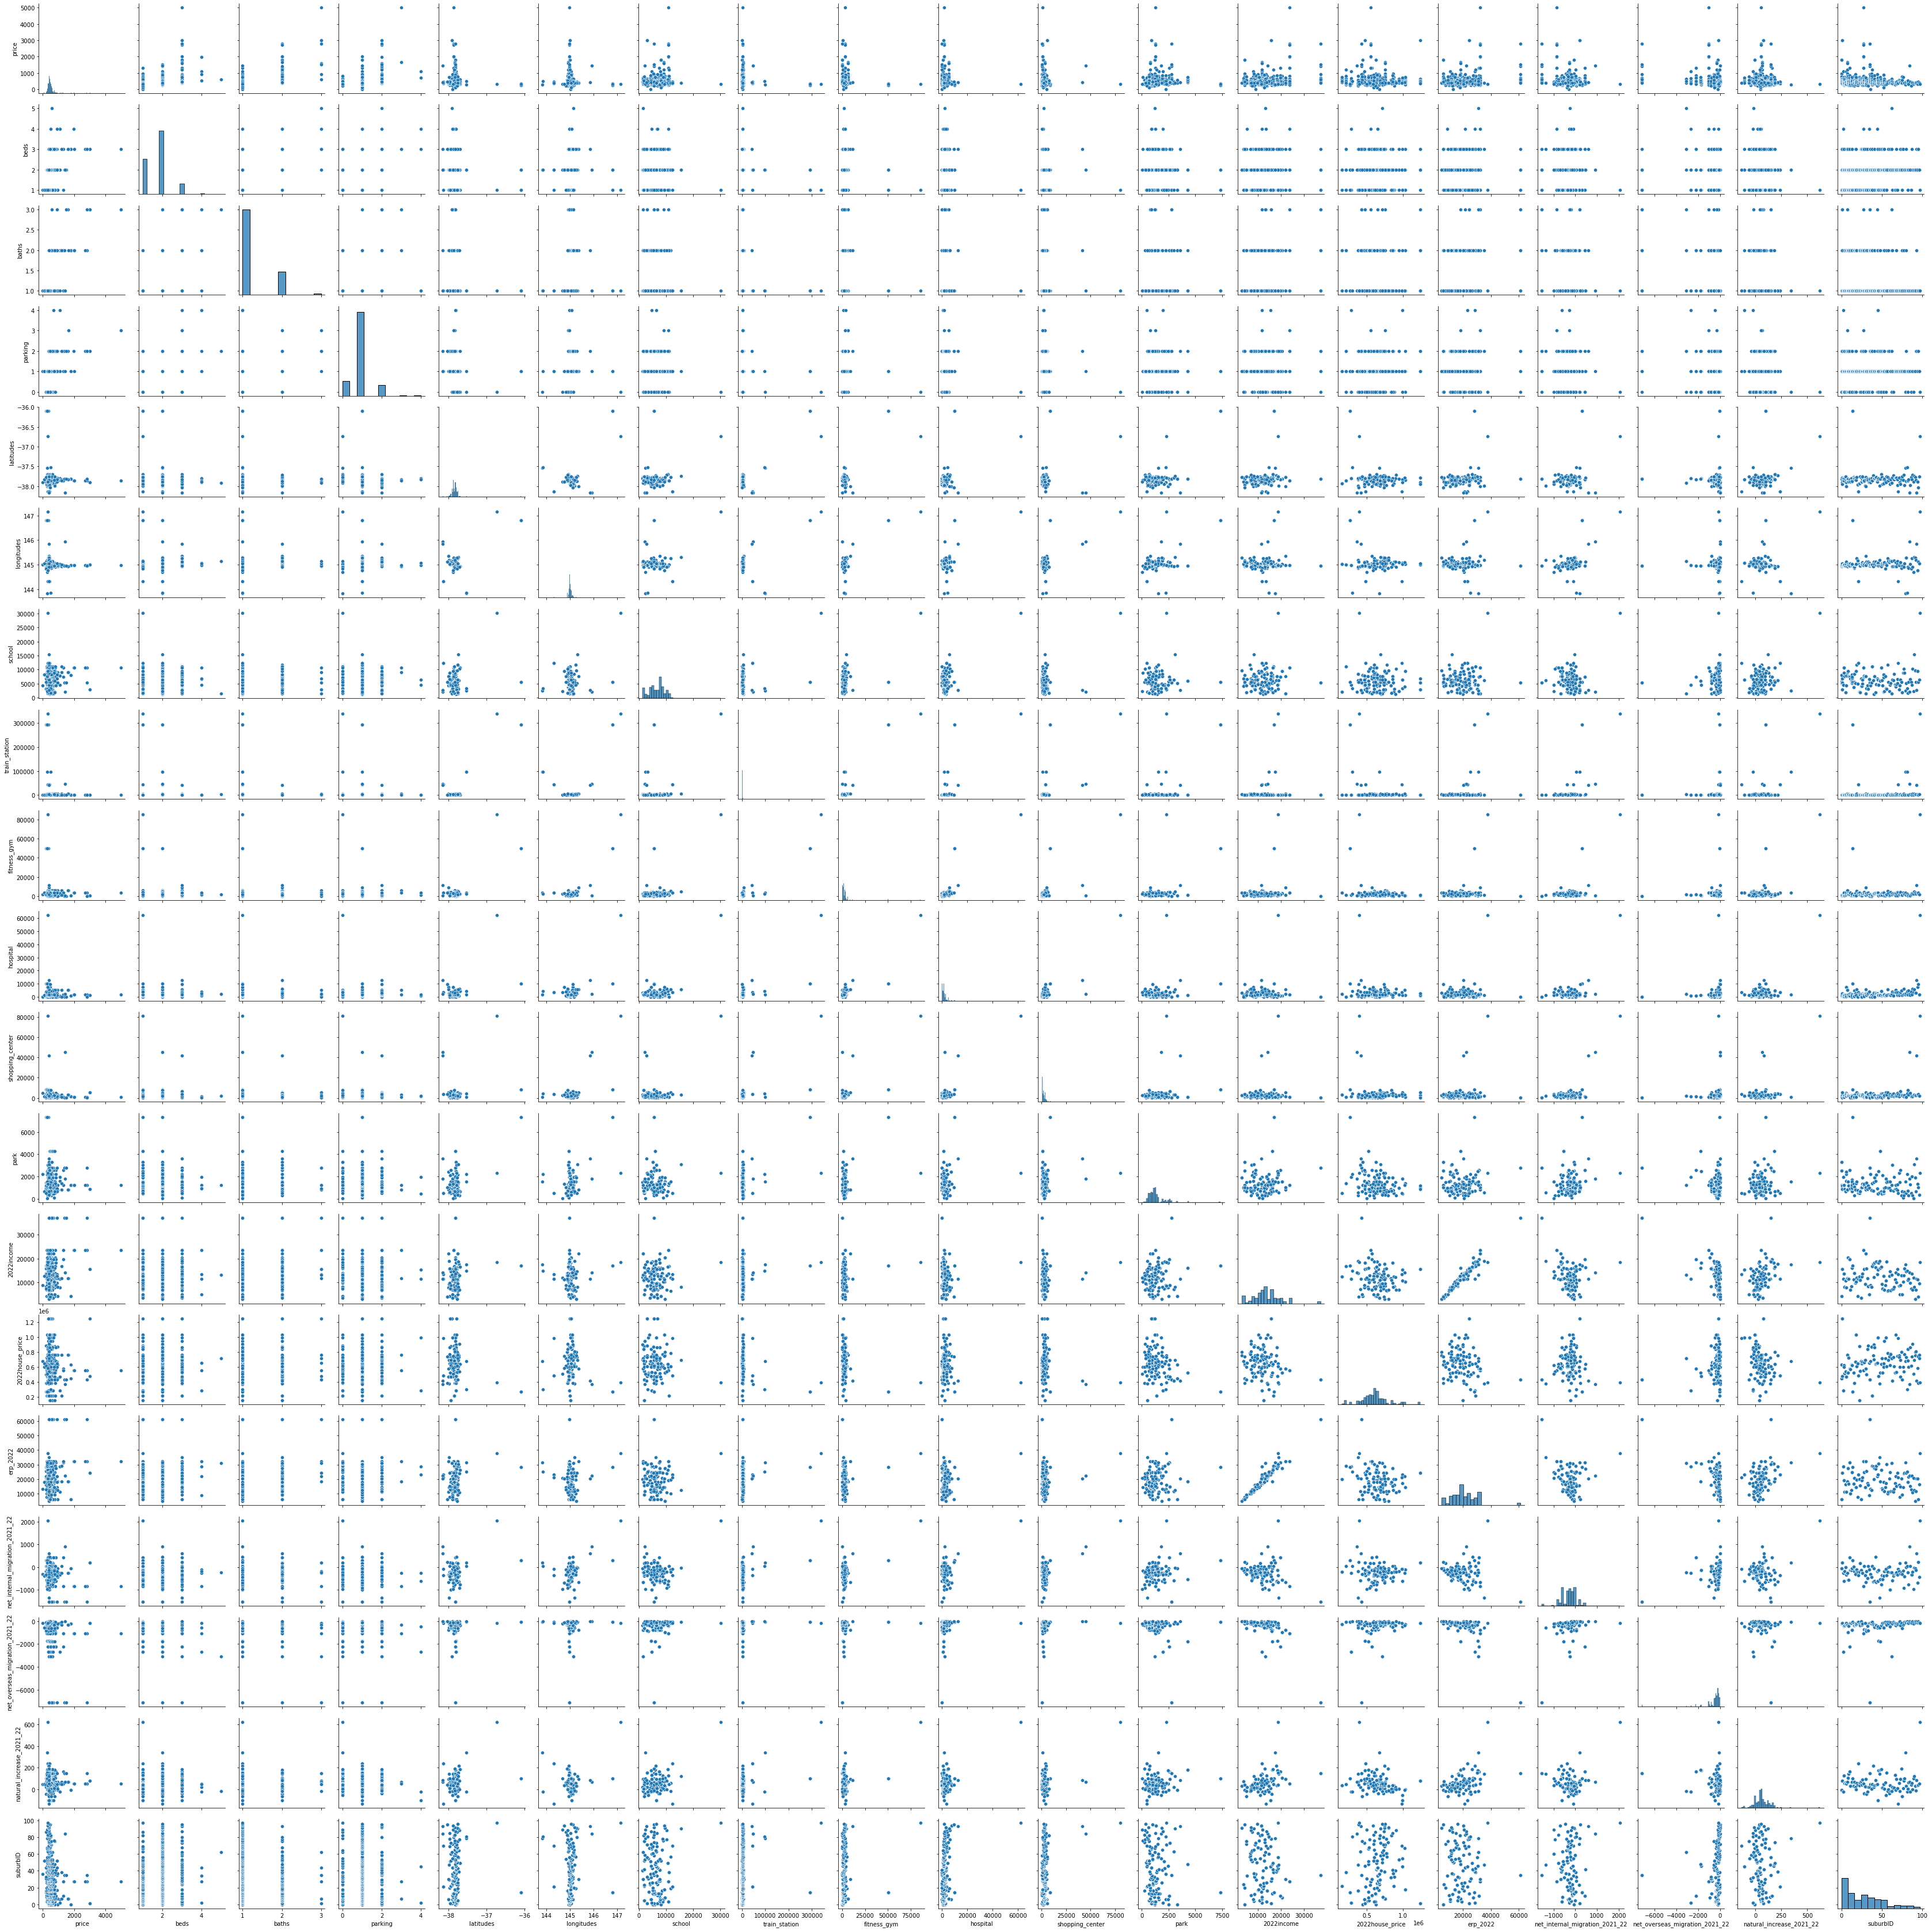

In [8]:
sns.pairplot(apart)
plt.show()

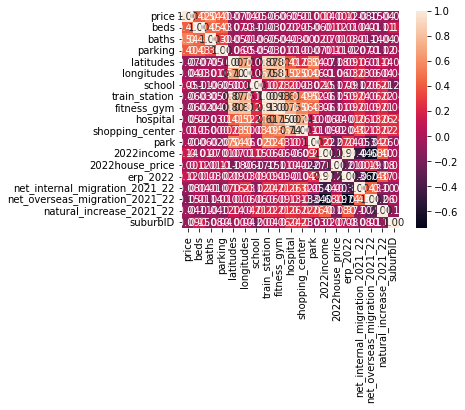

In [9]:
sns.heatmap(apart.corr(),cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.savefig("../plots/apart_corr_heatmap.png")
plt.show()

## Data split

In [10]:
# set prices as responses/labels
x = apart.drop(["price", "suburb"], axis=1)
y = apart["price"]

from sklearn.model_selection import train_test_split
# split training and test sets
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size=0.2)

## Data Visualization

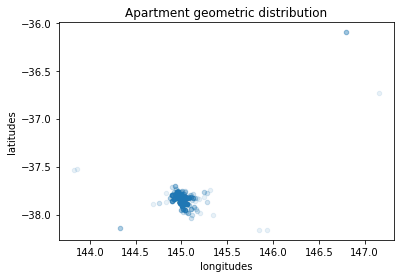

In [11]:
# check properties' distribution
apart.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.1)
plt.title("Apartment geometric distribution")
plt.savefig("../plots/apart_geo_distribution.png")
plt.show()

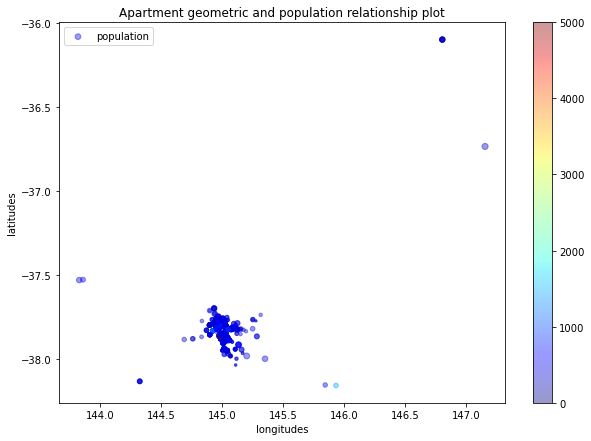

In [12]:
# the circle represents the population; the different colors represent \
# the house price from blue(low) to red(high)
camp1=plt.get_cmap("jet")
apart.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.4,\
           s=apart["erp_2022"]/1000, label="population", figsize=(10, 7),\
           c=apart['price'], colormap=camp1, colorbar=True, sharex=False)
plt.title("Apartment geometric and population relationship plot")
plt.savefig("../plots/apart_pop_price_location.png")
plt.show()

In [13]:
apart.columns

Index(['price', 'suburb', 'beds', 'baths', 'parking', 'latitudes',
       'longitudes', 'school', 'train_station', 'fitness_gym', 'hospital',
       'shopping_center', 'park', '2022income', '2022house_price', 'erp_2022',
       'net_internal_migration_2021_22', 'net_overseas_migration_2021_22',
       'natural_increase_2021_22', 'suburbID'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

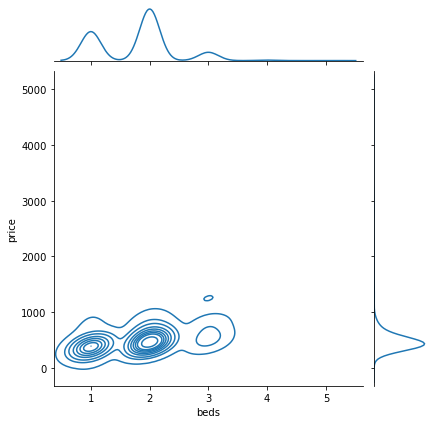

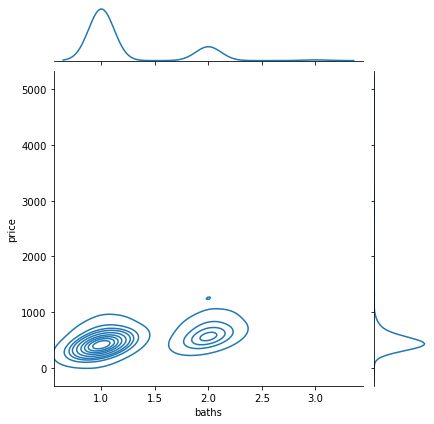

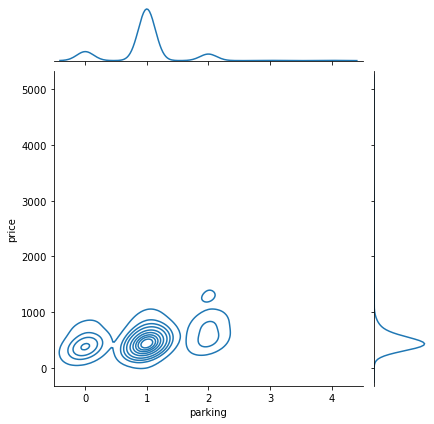

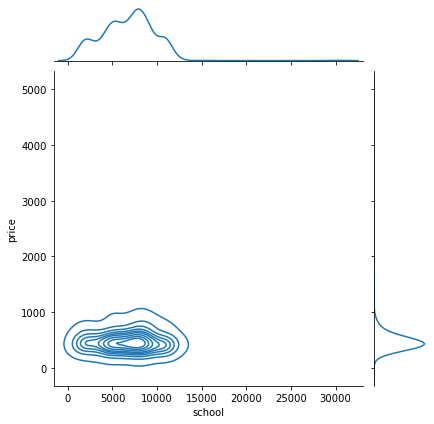

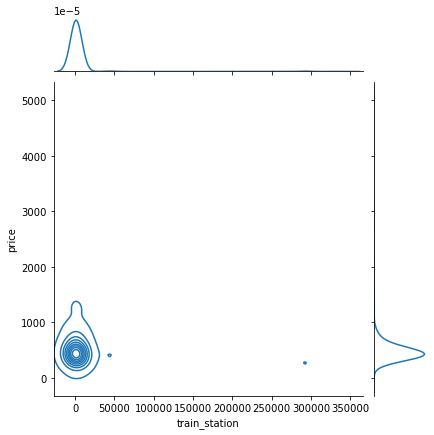

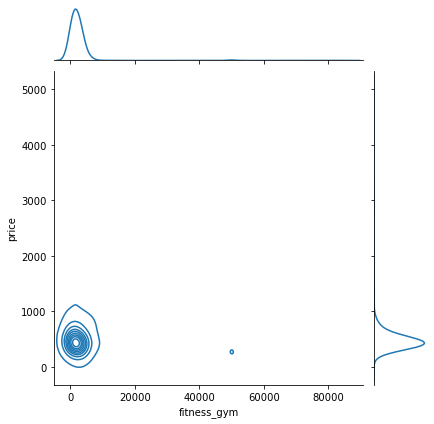

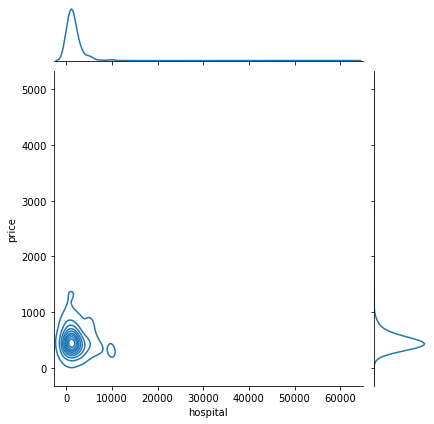

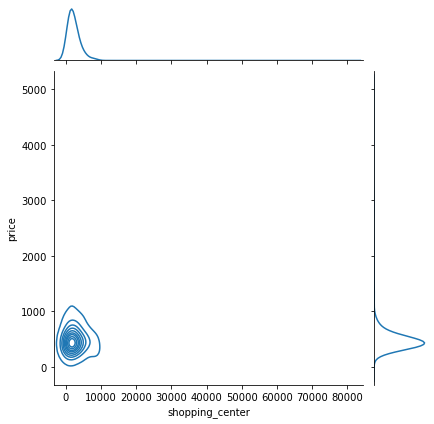

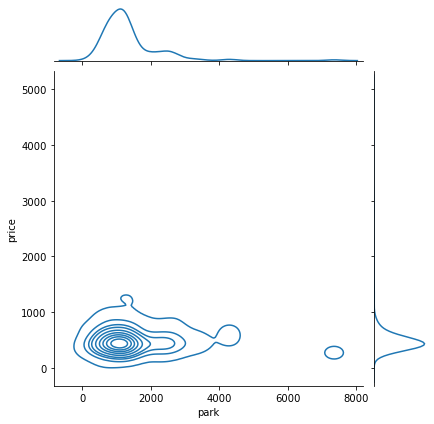

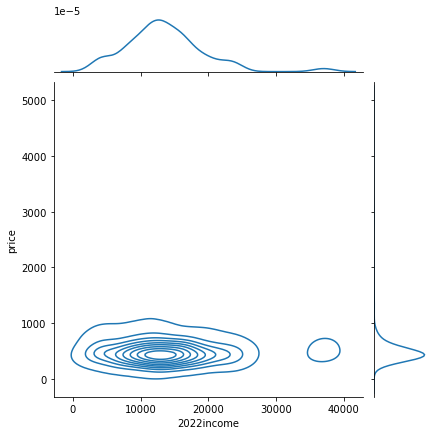

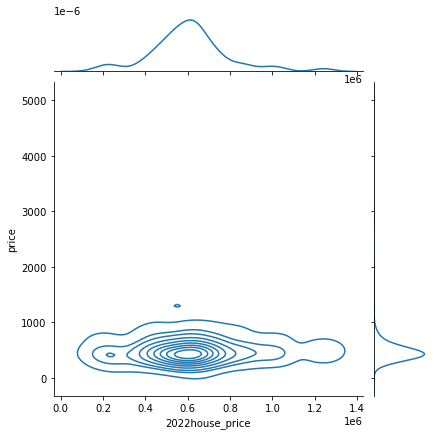

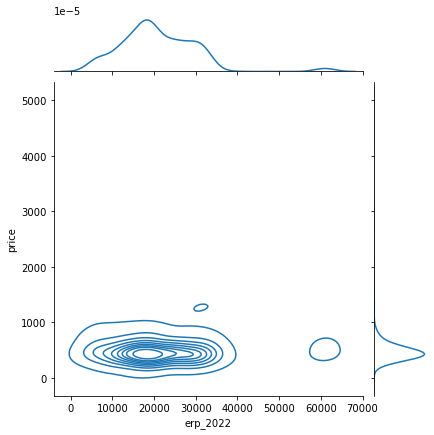

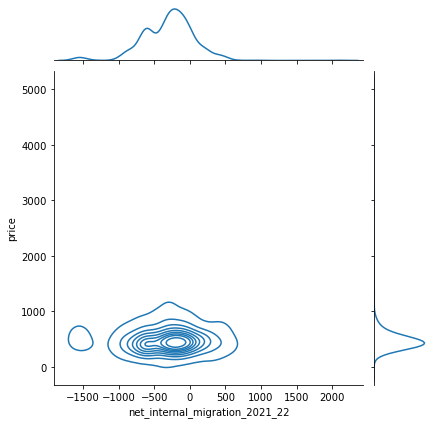

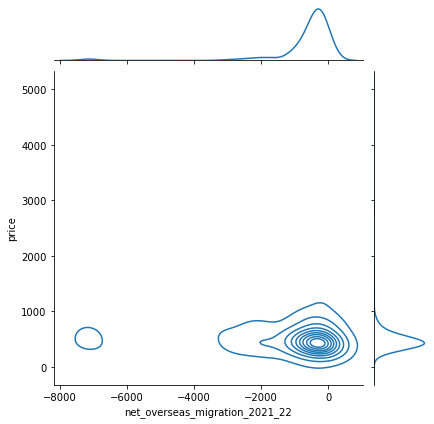

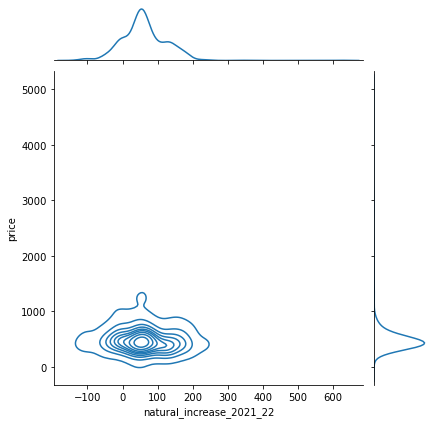

In [14]:
# Visualising the Correlation between each column and the target variable using jointplot 
plt.figure(figsize=(10,8))
sns.jointplot(x=apart["beds"], y=apart["price"],kind="kde")
sns.jointplot(x=apart["baths"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["parking"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["school"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["train_station"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["fitness_gym"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["hospital"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["shopping_center"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["park"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["2022income"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["2022house_price"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["erp_2022"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["net_internal_migration_2021_22"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["net_overseas_migration_2021_22"], y=apart["price"], kind="kde")
sns.jointplot(x=apart["natural_increase_2021_22"], y=apart["price"], kind="kde")
plt.show()

By setting the 'kind' parameter to 'kde', the JointPlot illustrates binary density curves on the main graph and unary density curves on the edges. We can see that beds and baths have the most concentrated graph, hence more correlated to price.

## Models

In [15]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [16]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

### KNN: predict house price

In [17]:
# Standardization

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(Xtrain)
x_test_scaled=scaler.transform(Xtest)
 
regressor=KNeighborsRegressor()
regressor.fit(x_train_scaled, Ytrain)
y_pred=regressor.predict(x_test_scaled)
mae, mse, rmse, r_squared = evaluation(Ytest, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "KNN","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)


MAE: 84.16107382550335
MSE: 28573.71812080537
RMSE: 169.03762338842017
R2 Score: -0.28934770637795215


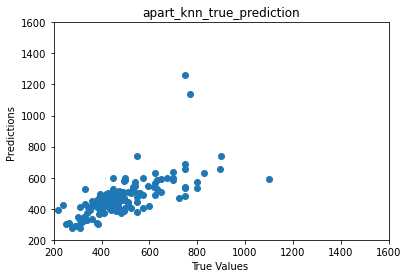

In [18]:
plt.scatter(Ytest, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_knn_true_prediction")
plt.savefig("../plots/apart_knn_true_prediction.png")
plt.show()

## Decision Tree

In [19]:

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train_scaled,Ytrain)
apart_predictions = tree_reg.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, apart_predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Decision_Tree","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 79.63966123362096
MSE: 17926.012949139385
RMSE: 133.88806126439871
R2 Score: 0.1911145905913737


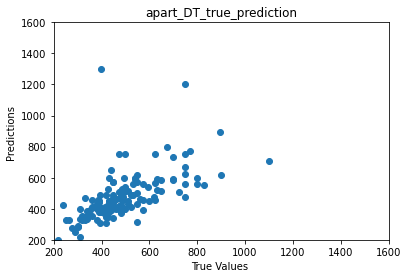

In [20]:
plt.scatter(Ytest, apart_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_DT_true_prediction")
plt.savefig("../plots/apart_DT_true_prediction.png")
plt.show()

## xgboost

In [21]:
reg=XGBRegressor(n_estimators=1000,eta=0.05).fit(x_train_scaled,Ytrain)
print(reg.score(x_train_scaled,Ytrain))
pres=reg.predict(x_test_scaled)
mae, mse, rmse, r_squared = evaluation(Ytest, pres)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Xgboost","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

0.9504405148015017
MAE: 76.71982876566433
MSE: 13409.50876717585
RMSE: 115.7994333629308
R2 Score: 0.3949153099531624


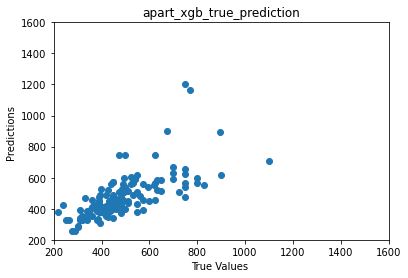

In [22]:
plt.scatter(Ytest, pres)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_xgb_true_prediction")
plt.savefig("../plots/apart_xgb_true_prediction.png")
plt.show()

## Random Forest Regression

In [23]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train_scaled, Ytrain)
predictions = random_forest.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 81.11393744020815
MSE: 17672.54871516981
RMSE: 132.9381386779949
R2 Score: 0.20255179758473174


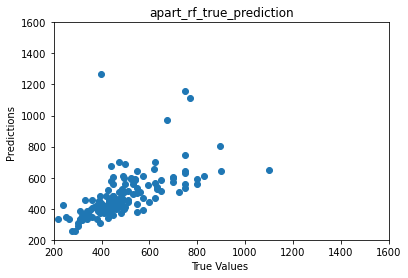

In [24]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_rf_true_prediction")
plt.savefig("../plots/apart_rf_true_prediction.png")
plt.show()

## Ridge Regression

In [25]:
ridge = Ridge()
ridge.fit(x_train_scaled, Ytrain)
predictions = ridge.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 123.74812544483004
MSE: 26508.952322331745
RMSE: 162.8157004785833
R2 Score: -0.1961781358231427


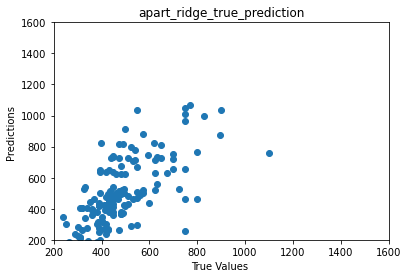

In [26]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_ridge_true_prediction")
plt.savefig("../plots/apart_ridge_true_prediction.png")
plt.show()

## Lasso Regression

In [27]:
lasso = Lasso()
lasso.fit(x_train_scaled, Ytrain)
predictions = lasso.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 122.80546385030117
MSE: 26139.475486401258
RMSE: 161.67707161623522
R2 Score: -0.1795060279458034


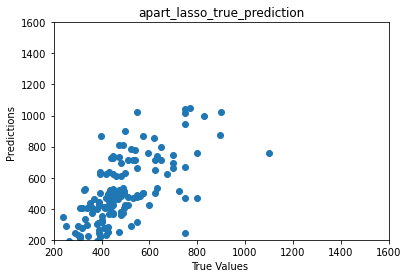

In [28]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_lasso_true_prediction")
plt.savefig("../plots/apart_lasso_true_prediction.png")
plt.show()

## Elastic Net

In [29]:
elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled, Ytrain)
predictions = elastic_net.predict(x_test_scaled)

mae, mse, rmse, r_squared = evaluation(Ytest, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 104.133481693108
MSE: 19432.135823820874
RMSE: 139.39919592243305
R2 Score: 0.1231529740532733


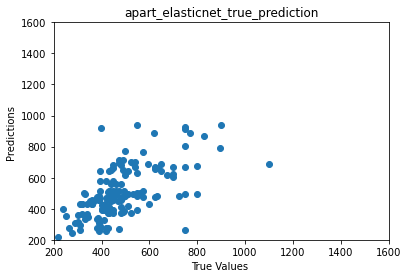

In [30]:
plt.scatter(Ytest, predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_elasticnet_true_prediction")
plt.savefig("../plots/apart_elasticnet_true_prediction.png")
plt.show()

## Data Correlation

In [31]:
apart = apart.rename(columns={'2022house_price':'houseprice', '2022income':'income'})

In [32]:
corr_matrix = apart.corr()

In [33]:
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
baths                             0.535119
beds                              0.416949
parking                           0.398745
income                            0.143476
erp_2022                          0.124132
school                            0.050681
shopping_center                   0.009913
houseprice                        0.002945
park                             -0.002286
natural_increase_2021_22         -0.037299
longitudes                       -0.043631
hospital                         -0.048348
fitness_gym                      -0.058170
train_station                    -0.059340
latitudes                        -0.071373
net_internal_migration_2021_22   -0.075777
suburbID                         -0.091219
net_overseas_migration_2021_22   -0.154204
Name: price, dtype: float64

## Linear Regression: use ols model 

In [34]:
fitter = ols(
    formula="price ~ beds + baths + parking  + school + train_station + fitness_gym + hospital + shopping_center + park + suburbID",
    data=apart
).fit()
print(fitter.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     47.25
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           1.20e-72
Time:                        14:46:03   Log-Likelihood:                -5171.1
No. Observations:                 744   AIC:                         1.036e+04
Df Residuals:                     733   BIC:                         1.041e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -230.4284     48.849     

Select useful columns for prediction x is indenpendent variable y is dependent variable


In [35]:
x = apart[['beds', 'baths', 'parking', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'income', 'houseprice',
        'erp_2022', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', 'natural_increase_2021_22',
       'suburbID']]
y = apart['price']

Split training and testing data

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Build an OLS regression model

In [37]:
lm = sm.OLS(y_train,x_train)
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              166.8
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                   1.44e-204
Time:                        14:46:03   Log-Likelihood:                         -4152.0
No. Observations:                 595   AIC:                                      8336.
Df Residuals:                     579   BIC:                                      8406.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [38]:
fitter = ols(
    formula="price ~ beds + baths + parking  + school + train_station + hospital\
    + income + houseprice + erp_2022 + net_internal_migration_2021_22 + park + natural_increase_2021_22 + suburbID",
    data=apart
).fit()
print(fitter.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           6.66e-72
Time:                        14:46:03   Log-Likelihood:                -5166.9
No. Observations:                 744   AIC:                         1.036e+04
Df Residuals:                     730   BIC:                         1.043e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Define the  evaluation metric

In [39]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Predict for test and train & show evaluation accuracy


In [40]:
test_pred = fitter.predict(x_test)
train_pred = fitter.predict(x_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)


Test set evaluation:

MAE: 113.73223147783843
MSE: 37602.05096244278
RMSE: 193.91248274013404
R2 Square 0.40632354547169647
Train set evaluation:

MAE: 136.5041199034638
MSE: 69414.535780607
RMSE: 263.4663845362573
R2 Square 0.3965945160581579


In [41]:
new_row = {"Model": "OLS","MAE": 211.06909797492884, "MSE": 104337.71364719725, "RMSE": 323.0134883363189, "R2 Score": 0.4140856761958088}
models = models.append(new_row, ignore_index=True)

Predict value and true value correlation scatter plot

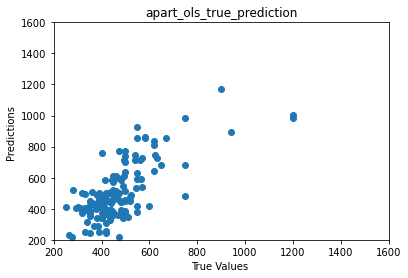

In [42]:
plt.scatter(y_test, test_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.xlim(200, 1600)
plt.ylim(200, 1600)
plt.title("apart_ols_true_prediction")
plt.savefig("../plots/apart_ols_true_prediction.png")
plt.show()

## Neural Network Model (MLP)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import  metrics

In [44]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500), random_state=1)
clf.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=3500, random_state=1,
              solver='lbfgs')

In [45]:
#accuracy and confusion matrix
predicted = clf.predict(x_train)
expected = y_train

In [46]:
def cv_mlp_model(x_train, y_train, hidden_size, learn_rate):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_size,max_iter=1000,solver='adam',verbose=10,learning_rate_init=learn_rate)
    # do 10-fold cross validation
    scores = cross_val_score(mlp, x_train, y_train, cv=10)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores

In [47]:
mlp = cv_mlp_model(x_train,y_train,20,0.5)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Iteration 1, loss = 35.43738931
Iteration 2, loss = 35.57256175
Iteration 3, loss = 16.18362607
Iteration 4, loss = 4.69715004
Iteration 5, loss = 4.78124203
Iteration 6, loss = 4.86422064
Iteration 7, loss = 4.87523186
Iteration 8, loss = 4.84652319
Iteration 9, loss = 4.80897792
Iteration 10, loss = 4.77679389
Iteration 11, loss = 4.72824121
Iteration 12, loss = 4.66692614
Iteration 13, loss = 4.61078993
Iteration 14, loss = 4.56015181
Iteration 15, loss = 4.50386253
Iteration 16, loss = 4.45158909
Iteration 17, loss = 4.41483818
Iteration 18, loss = 4.38050992
Iteration 19, loss = 4.35393432
Iteration 20, loss = 4.32787471
Iteration 21, loss = 4.30151245
Iteration 22, loss = 4.29060166
Iteration 23, loss = 4.28387652
Iteration 24, loss = 4.27593977
Iteration 25, loss = 4.27296598
Iteration 26, loss = 4.26554873
Iteration 27, loss = 4.26884896
Iteration 28, loss = 4.26708725
Iteration 29, loss = 4.26396535
Iteration 30, loss = 4.26175797
Iteration 31, loss = 4.25976455
Iteration 32, 

MLP performance bad



In [48]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
2,Xgboost,76.719829,13409.508767,115.799433,0.394915
3,RandomForestRegressor,81.113937,17672.548715,132.938139,0.202552
1,Decision_Tree,79.639661,17926.012949,133.888061,0.191115
6,ElasticNet,104.133482,19432.135824,139.399196,0.123153
5,Lasso,122.805464,26139.475486,161.677072,-0.179506
4,Ridge,123.748125,26508.952322,162.815700,-0.196178
0,KNN,84.161074,28573.718121,169.037623,-0.289348
7,OLS,211.069098,104337.713647,323.013488,0.414086


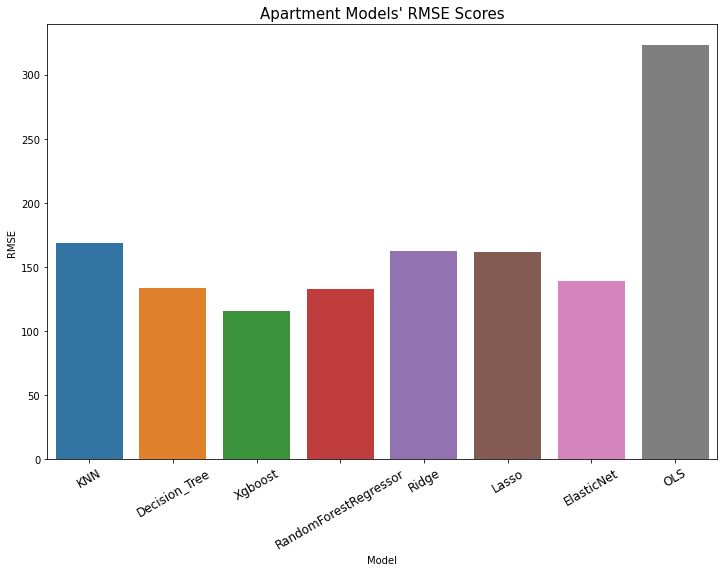

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Apartment Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.savefig("../plots/apart_models_performance.png")
plt.show()

The Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction error). The residual measures the distance of the data points in the regression line; RMSE measures the extent to which these residuals are distributed. In other words, it indicates how concentrated the data is around the best-fit line. If the RMSE for the test set is much higher than that of the training set, it is likely that the data badly overfitted. Therefore, from the plot Models' RMSE Scores, it is evident that Xgboost model has the best performance and should be chosen as our final model. 